## Group contribution 
### Ravi Teja 
### Shreya Agarwal
### Ravi Vaishnav

In [1]:
!pip install Gudiya==0.1.1.4

  Created wheel for Gudiya: filename=Gudiya-0.1.1.4-cp36-none-any.whl size=5033 sha256=a147f3ee5b894b8023b684f5864535751d87f82232bf3ee851e5775bf76967ec
  Stored in directory: /root/.cache/pip/wheels/cc/66/13/a594195e11de54abf7acff64b4b5b6cc93d77155aacd075753
Successfully built Gudiya


In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:
import Gudiya.Model as Md
import Gudiya.TrainTestandUtils as Tt

In [4]:
transform = transforms.Compose(
    [ transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


In [0]:
model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=20,
               input_size=(3,32,32),
               classes=classes)

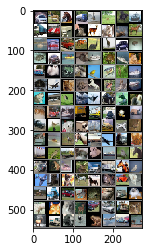

In [7]:
new_model.plot_train_images()

In [8]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [9]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.1093018054962158 Batch_id=390 Accuracy=46.47: 100%|██████████| 391/391 [00:54<00:00,  7.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 5711/10000 (57.11%)

EPOCH  2


Loss=0.8955060839653015 Batch_id=390 Accuracy=61.65: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 6868/10000 (68.68%)

EPOCH  3


Loss=0.6422064900398254 Batch_id=390 Accuracy=70.30: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 7017/10000 (70.17%)

EPOCH  4


Loss=0.7789468765258789 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7438/10000 (74.38%)

EPOCH  5


Loss=0.4789551794528961 Batch_id=390 Accuracy=79.52: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7401/10000 (74.01%)

EPOCH  6


Loss=0.3873501420021057 Batch_id=390 Accuracy=81.88: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7731/10000 (77.31%)

EPOCH  7


Loss=0.4145545959472656 Batch_id=390 Accuracy=83.76: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8219/10000 (82.19%)

EPOCH  8


Loss=0.42313796281814575 Batch_id=390 Accuracy=85.49: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8412/10000 (84.12%)

EPOCH  9


Loss=0.33995312452316284 Batch_id=390 Accuracy=86.43: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8353/10000 (83.53%)

EPOCH  10


Loss=0.3149535059928894 Batch_id=390 Accuracy=87.52: 100%|██████████| 391/391 [00:55<00:00,  7.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8462/10000 (84.62%)

EPOCH  11


Loss=0.3034308850765228 Batch_id=390 Accuracy=88.16: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8460/10000 (84.60%)

EPOCH  12


Loss=0.4143068790435791 Batch_id=390 Accuracy=89.13: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8510/10000 (85.10%)

EPOCH  13


Loss=0.40727829933166504 Batch_id=390 Accuracy=90.15: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 8606/10000 (86.06%)

EPOCH  14


Loss=0.3269943296909332 Batch_id=390 Accuracy=91.19: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8592/10000 (85.92%)

EPOCH  15


Loss=0.33613061904907227 Batch_id=390 Accuracy=92.42: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0027, Accuracy: 8797/10000 (87.97%)

EPOCH  16


Loss=0.08740292489528656 Batch_id=390 Accuracy=93.80: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0026, Accuracy: 8893/10000 (88.93%)

EPOCH  17


Loss=0.23754969239234924 Batch_id=390 Accuracy=95.32: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9029/10000 (90.29%)

EPOCH  18


Loss=0.07200460880994797 Batch_id=390 Accuracy=96.57: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0020, Accuracy: 9179/10000 (91.79%)

EPOCH  19


Loss=0.1113690510392189 Batch_id=390 Accuracy=97.57: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0019, Accuracy: 9216/10000 (92.16%)

EPOCH  20


Loss=0.03336750715970993 Batch_id=390 Accuracy=97.90: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]


Test set: Average loss: 0.0018, Accuracy: 9248/10000 (92.48%)

